# Visualización de datos con pandas/matplotlib

> La librería `pandas` se integra con `matplotlib` para permitir la visualización directa de Dataframes.
> A continuación veremos cómo generar distintos tipos de gráficos.

El primer paso es importar las librerías (pandas + librerías gráficas).

Igualmente configuraremos el cuaderno `jupyter` para mostrar los gráficos dentro de las celdas del cuaderno.
En este caso se permite el uso de "atajos" (_magic_), caracterizados por comenzar por el caracter `'%'`.

In [21]:
%matplotlib inline
# atajo `matplotlib` siempre antes de `import pandas`

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns  # opcional

En este punto podemos, opcionalmente, establecer diferentes parámetros gráficos, como el [estilo](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html), tamaño por defecto de las imágenes, etc.

In [23]:
sns.set()
# De forma alternativa, sin seaborn:
# plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.rcParams['font.family'] = ['monospace']

Dibujar directamente con `matplotlib` exige controlar cada uno de los detalles (color, etiquetas, título, ...)

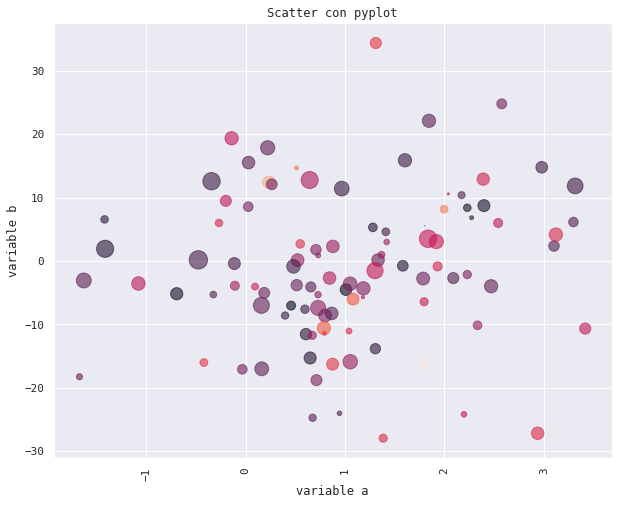

In [24]:
N = 100
np.random.seed(7384)

data = {'a': np.random.randn(N) + 1,
        'c': np.random.gamma(10, size=N),
        'd': np.random.randn(N) - 1}
data['b'] = data['a'] + 10 * np.random.randn(N)
data['d'] = np.abs(data['d']) * N

plt.scatter('a', 'b', s='d', c='c', data=data, alpha=0.6)
plt.xlabel('variable a')
plt.ylabel('variable b')
plt.xticks(rotation='vertical')
plt.title('Scatter con pyplot');

True

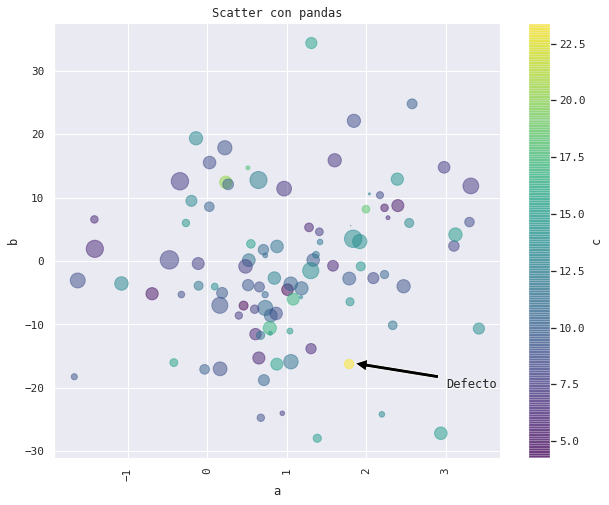

In [25]:
fig, ax = plt.subplots()
df = pd.DataFrame.from_dict(data)
ax2 = df.plot.scatter(
    'a', 'b', c='c', s=df['d'],
    colormap='viridis', alpha=.5,
    title='Scatter con pandas', rot='vertical',
    ax=ax)
ax.annotate(
    'Defecto', xy=(1.8, -16),
     xytext=(3, -20),
     arrowprops=dict(facecolor='black', shrink=0.05)
);

ax2 == ax

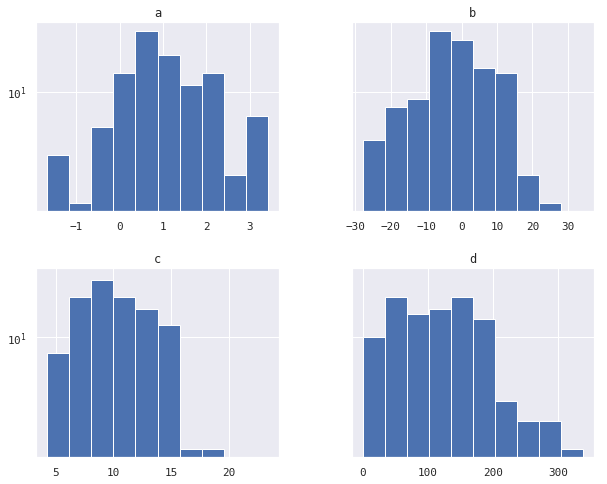

In [26]:
df.hist(sharey=True, log=True);  # finalizar con caracter ';' omite el texto de salida

Para crear varios gráficos superpuestos, almacenaremos el eje (`ax`) donde dibujar

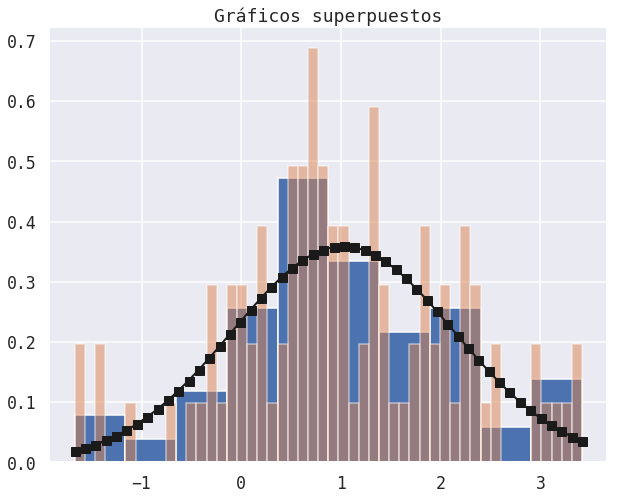

In [27]:
with sns.plotting_context("talk", rc={"lines.linewidth": 2}):

    bins = 50
    ax = df.hist('a', density=1)  # creado directamente
    df.hist('a', bins=bins, density=1, alpha=.5, ax=ax)

    x = np.linspace(
        df.a.min(),
        df.a.max(),
        bins
    )
    y = (1 / (np.sqrt(2 * np.pi) * df.a.std())) * \
        np.exp(-0.5 * (1 / df.a.std() * (x - df.a.mean()))**2)

    plt.plot(x, y, 'ks-');
    plt.title('Gráficos superpuestos');

## Paleta de colores


En `matplotlib` usaremos

plt.set_cmap('Reds')

o bien, cada vez que dibujemos:

~~~python
cmap = plt.cm.Reds
data.plot.scatter(x, y, cm=cmap)
~~~

En `seaborn`:

Global:
~~~python
sns.set_palette(sns.color_palette('Reds'))
~~~

Temporal:
~~~python
with sns.color_palette('Greens'):
    ...
~~~

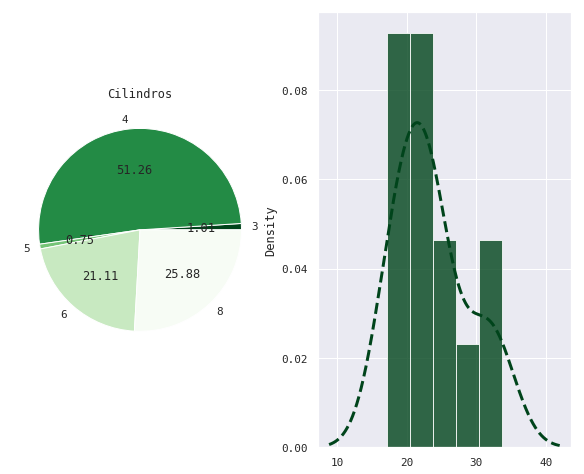

In [28]:
ax = plt.subplot(121)

df = sns.load_dataset('mpg')
cmap = plt.cm.Greens_r

df1 = df.groupby(by='cylinders').count().name
df1.reset_index()
ax = df1.plot.pie(cmap=cmap, title='Cilindros', autopct='%.2f', ax=ax)
ax.set_ylabel('')

ax = plt.subplot(122)
df2 = df.groupby('model_year').agg('mean').sort_values('weight')

df2.mpg.plot.hist(density=True, bins=5, alpha=.8, cmap=cmap, ax=ax)
df2.mpg.plot.kde(linewidth=3, style='--', cmap=cmap, ax=ax);

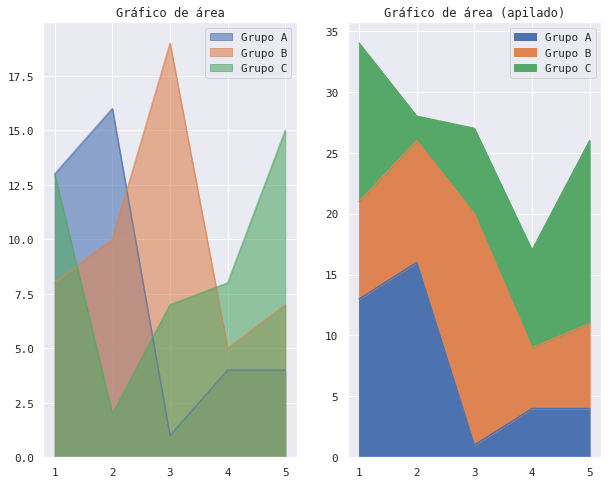

In [29]:
np.random.seed(0)
N = 5
data = pd.DataFrame({'Grupo A': np.random.randint(1, 20, N),
                     'Grupo B': np.random.randint(1, 20, N),
                     'Grupo C': np.random.randint(1, 20, N)},
                    index=range(1, N+1))

fig, ax = plt.subplots(1, 2)
data.plot.area(stacked=False, alpha=.6, title='Gráfico de área', ax=ax[0])

data.plot.area(title='Gráfico de área (apilado)', ax=ax[1]);

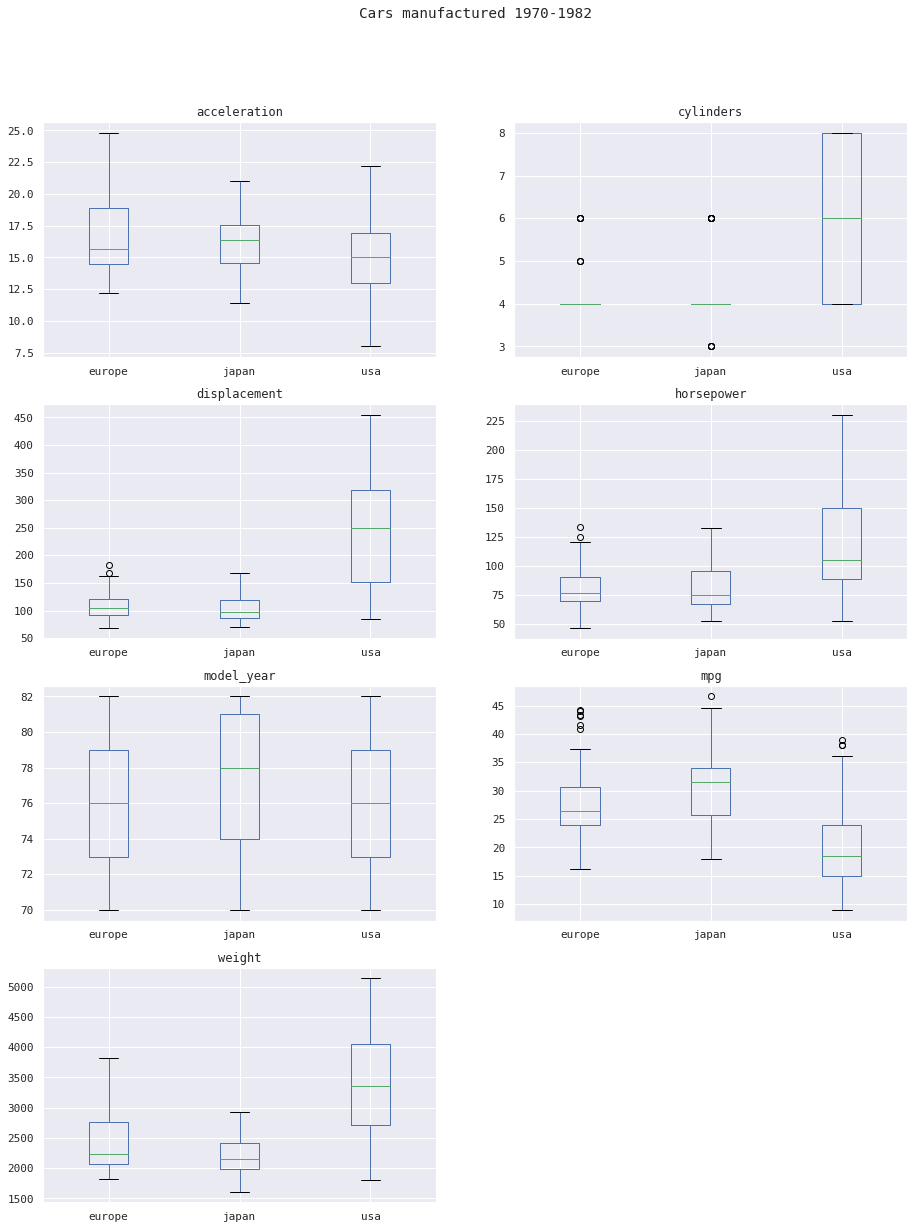

In [30]:
fig, ax = plt.subplots(4, 2, figsize=(15, 20))

# Número de subplots debe ser igual al número de variables (7)
ax[-1, -1].axis('off')  # no dibujar el último
ax=ax.flatten()[:-1]  # eliminar el último de la lista

df.boxplot(by='origin', ax=ax)
fig.suptitle('Cars manufactured 1970-1982')
_ = [_ax.set_xlabel('') for _ax in ax]


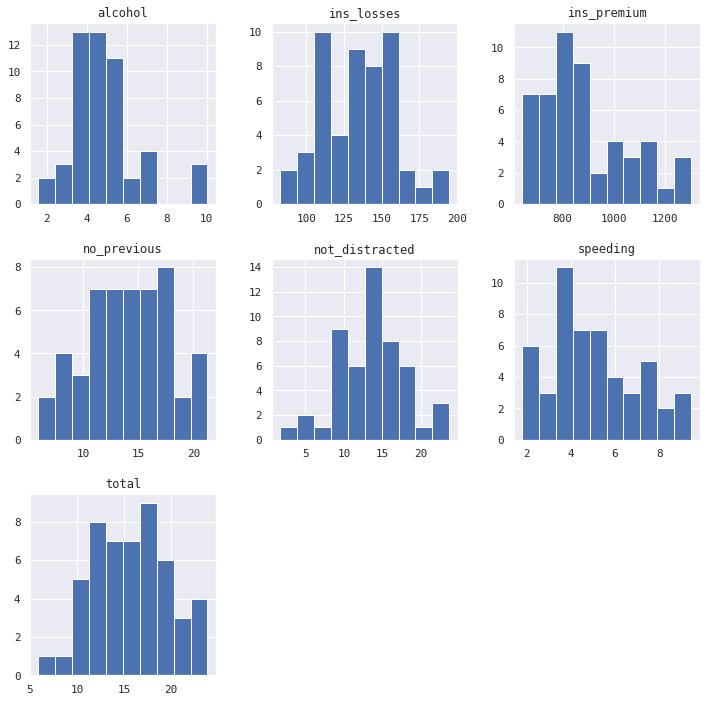

In [31]:
crashes = sns.load_dataset('car_crashes')
crashes.hist(figsize=(12, 12));

In [32]:
marriages = pd.read_csv('http://www.ine.es/jaxi/files/_px/es/csv_sc/t20/e301/provi/03009.csv_sc',
                        sep=';', encoding='utf-8',
                        na_values='..',
                        header=[4, 5], index_col=0)[:-2]
marriages.drop(marriages.columns[-1], axis=1, inplace=True)

meses = marriages.columns.get_level_values(0)[0::5].values.repeat(5)
marriages.columns = pd.MultiIndex.from_tuples(zip(meses, marriages.columns.get_level_values(1)))
provincias = ['Cantabria', 'Madrid', 'Murcia', 'León', 'Albacete']
df = marriages.Total.loc[provincias]

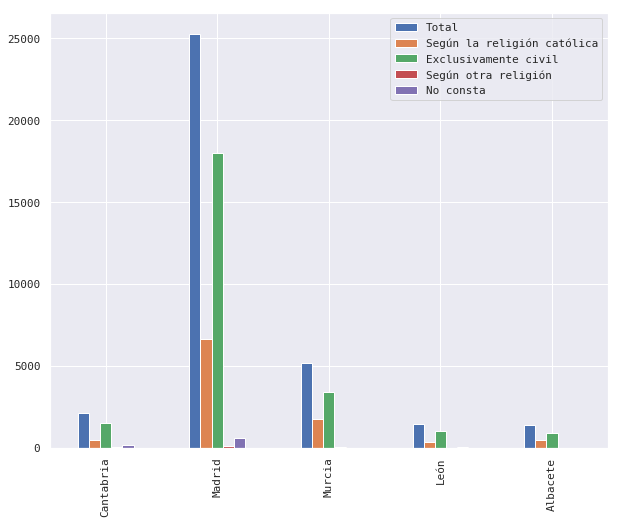

In [33]:
df.plot.bar();